## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column.
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [11]:
# pd.set_option('display.max_rows', 100)

In [12]:
# Loading the the csv of amzaon uk
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [13]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [14]:
df.shape

(2443651, 9)

In [15]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [16]:

# ### Part 1: Understanding Product Categories

# **Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

# 1. **Frequency Tables**:
#     - Generate a frequency table for the product `category`.
category_table = pd.crosstab(index = df["category"], columns="count").sort_values(by=['count'],ascending=False)
category_table
#     - Which are the top 5 most listed product categories?
top5_category_table = category_table.head()
top5_category_table


col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


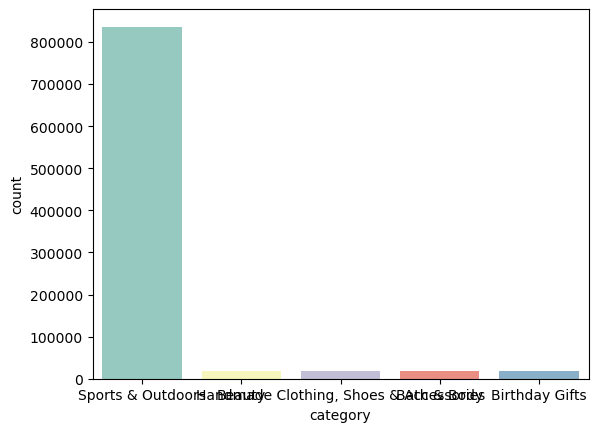

In [17]:
# 2. **Visualizations**:
#     - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
sns.barplot(x=top5_category_table.index, y=top5_category_table["count"], palette="Set3");


# ---

<Axes: ylabel='count'>

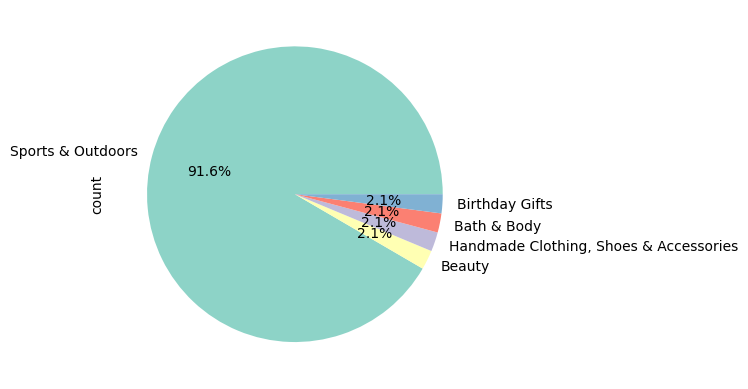

In [18]:

#     - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

top5_category_table['count'].plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Set3"))

In [19]:
# ### Part 2: Delving into Product Pricing

# **Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# 1. **Measures of Centrality**:
#     - Calculate the mean, median, and mode for the `price` of products.
#     - What's the average price point of products listed? How does this compare with the most common price point (mode)?

price_mean = df['price'].mean()
print(f'Average of price: {price_mean}')

price_median = df['price'].median()
print(f'Median of price: {price_median}')

price_mode = df['price'].mode()[0]
print(f'Most common price (mode): {price_mode}')

#     - What's the average price point of products listed? How does this compare with the most common price point (mode)?

print(f'Average price compare to most common price: {price_mean-price_mode}')


# 2. **Measures of Dispersion**:
#     - Determine the variance, standard deviation, range, and interquartile range for product `price`.
price_variance = df['price'].var()
print(f'Variance of price: {price_variance}')

price_std = df['price'].std()
print(f'Standard deviation of price: {price_std}')

price_range = df['price'].max() - df['price'].min()
print(f'Range of price: {price_range}')

price_quantiles = df['price'].quantile([0.25, 0.5, 0.75])
print(f'InterQuartile range of price: \n{price_quantiles}')
#     - How varied are the product prices? Are there any indicators of a significant spread in prices?
# Most of the products are in the 75% quartile meaning.



Average of price: 89.24380943923663
Median of price: 19.09
Most common price (mode): 9.99
Average price compare to most common price: 79.25380943923663
Variance of price: 119445.48532256528
Standard deviation of price: 345.60886175352226
Range of price: 100000.0
InterQuartile range of price: 
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


KeyboardInterrupt: 

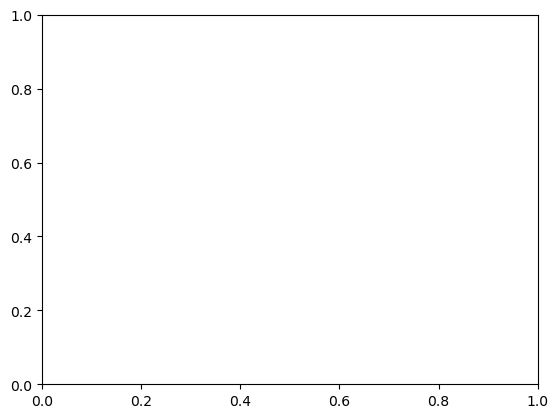

In [26]:
# 3. **Visualizations**:
#     - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
bins = range(1,2)
df['price_int'] = df['price'].astype(int)
filter_df_histplot = df[df['price']< 2000]
filter_df_histplot
# df_histplot= df[['price']]
# df_histplot
sns.histplot(filter_df_histplot, kde=True, bins=10, color="salmon")
# changing from float to int to remove decimal
# removing the price which have less than 50 products in the list




<Axes: >

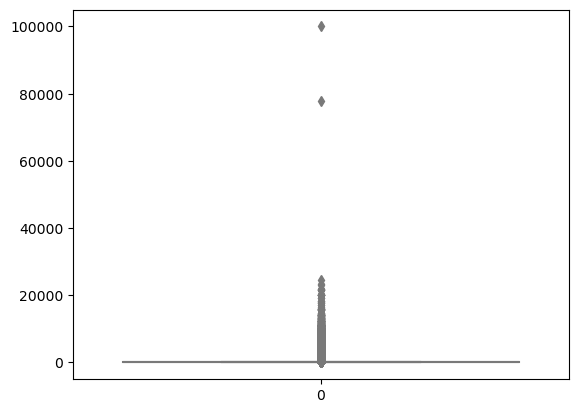

In [21]:
#     - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data = df['price'], color="lightblue")

In [22]:
df['price'].count()

2443651

In [23]:
df['price'].value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

Average of rating: 2.152836472966065
Median of rating: 0.0
Most common rating:  (mode): 0.0


<Axes: xlabel='stars', ylabel='Count'>

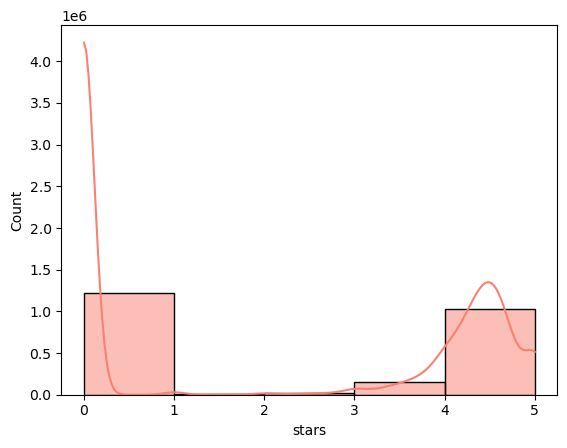

In [25]:

# ### Part 3: Unpacking Product Ratings

# **Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# 1. **Measures of Centrality**:
#     - Calculate the mean, median, and mode for the `rating` of products.
#     - How do customers generally rate products? Is there a common trend?
# most of the product are rated at 0
df['stars'].value_counts()
stars_mean = df['stars'].mean()
print(f'Average of rating: {stars_mean}')

stars_median = df['stars'].median()
print(f'Median of rating: {stars_median}')

stars_mode = df['stars'].mode()[0]
print(f'Most common rating:  (mode): {stars_mode}')


# 2. **Measures of Dispersion**:
#     - Determine the variance, standard deviation, and interquartile range for product `rating`.
df['stars'].describe()
#     - Are the ratings consistent, or is there a wide variation in customer feedback?

# 3. **Shape of the Distribution**:
#     - Calculate the skewness and kurtosis for the `rating` column.
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price
#     - Are the ratings normally distributed, or do they lean towards higher or lower values?

# 4. **Visualizations**:
#     - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(df['stars'], kde=True, bins=5, color="salmon")

# ---